Number of datasets: 5
Dataset 1 shape: (32,) (omega), (32,) (Tan Delta)
Dataset 2 shape: (32,) (omega), (32,) (Tan Delta)
Dataset 3 shape: (32,) (omega), (32,) (Tan Delta)
Dataset 4 shape: (32,) (omega), (32,) (Tan Delta)
Dataset 5 shape: (32,) (omega), (32,) (Tan Delta)


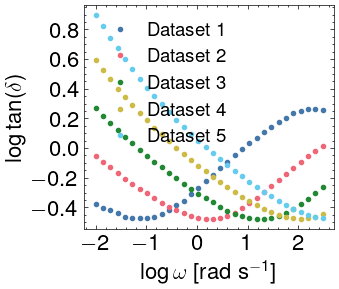

In [1]:
import pandas as pd
import numpy as np
import skopt
from scipy.optimize import minimize
from skopt import gp_minimize
from skopt.space import Real
import matplotlib.pyplot as plt
import scienceplots

# Ensure the 'scienceplots' style is used for better visualization
plt.style.use(['science', 'nature', 'bright'])

# List of files to process
filenames = [
    'demos/data/oscillation_ps130_data.csv',  # Reference file should go first in the list
    'demos/data/oscillation_ps145_data.csv',
    'demos/data/oscillation_ps160_data.csv',
    'demos/data/oscillation_ps175_data.csv',    
    'demos/data/oscillation_ps190_data.csv'
]

# Column names for the data files
columns = ['Angular Frequency', 'Storage Modulus', 'Loss Modulus']

# Lists to hold log-transformed data
omega_log_list = []
G_prime_log_list = []
G_double_prime_log_list = []
tan_delta_log_list = []

# Initialize the figure for visualization
plt.figure(figsize=(3.5, 3))

# Loop through each file and process the data
for i, filename in enumerate(filenames):
    # Load the data from the CSV file
    data = pd.read_csv(filename, decimal='.', encoding='utf-8', sep='\t')
    data.columns = columns

    # Extract and log-transform the 'Angular Frequency' and 'Relaxation Modulus' columns
    log_interval_omega = np.log10(data['Angular Frequency'])
    log_storage_modulus = np.log10(data['Storage Modulus'])
    log_loss_modulus = np.log10(data['Loss Modulus'])


    # Append the log-transformed data to the lists[i]
    omega_log_list.append(log_interval_omega)
    G_prime_log_list.append(log_storage_modulus)
    G_double_prime_log_list.append(log_loss_modulus)

    # Get tan delta and append it
    log_tan_delta = log_loss_modulus - log_storage_modulus
    tan_delta_log_list.append(log_tan_delta)

    # Optional: Plot each dataset for visualization
    plt.plot(log_interval_omega, log_tan_delta, 'o', label=f'Dataset {i+1}')


# Print the shapes of the arrays to confirm data structure
print("Number of datasets:", len(omega_log_list))


# Print sizes of individual datasets to understand structure
for idx, (omega_log, tan_delta_log) in enumerate(zip(omega_log_list, tan_delta_log_list)):
    print(f"Dataset {idx+1} shape: {omega_log.shape} (omega), {tan_delta_log.shape} (Tan Delta)")

# Finalize and show the plot

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\log \omega$ [rad s$^{-1}$]', fontsize=16)
plt.ylabel(r'$\log \tan(\delta)$', fontsize=16)
plt.legend(fontsize=13.5, loc='upper left', handletextpad=0.5)

# Add final touches to the plot
plt.grid(False)
plt.tight_layout()

# Save and display the plot
plt.show()

In [2]:
# Create a single array to analyze it with pyRheo
shifted_omega = []
G_prime = []
G_double_prime = []
shifts = [-2.367281698128791, -1.0036512443081456, 0, 0.7752131970083839, 1.4064373790693576]

for idx, (omega_log, G_prime_log, G_double_prime_log) in enumerate(zip(omega_log_list, G_prime_log_list, G_double_prime_log_list)):

    # Apply shift factor
    shifted_omega_log = omega_log - shifts[idx]
    
    # Convert log data back to linear scale and concatenate
    shifted_omega = np.concatenate([shifted_omega, 10**shifted_omega_log])    
    G_prime = np.concatenate([G_prime, 10**G_prime_log])
    G_double_prime = np.concatenate([G_double_prime, 10**G_double_prime_log])      


#print(shifted_omega)
#print(G_prime)
#print(G_double_prime)

In [3]:
# Create a DataFrame from omega and G_relax arrays
df = pd.DataFrame({'Angular Frequency': shifted_omega, 'G_prime': G_prime, 'G_double_prime': G_double_prime})

# Clean NaNs
df_cleaned = df.dropna()

# Reorder the DataFrame by 'Angular Frequency' from minimum to maximum
df_sorted = df_cleaned.sort_values(by='Angular Frequency', ascending=True).reset_index(drop=True)

# Show the DataFrame (optional)
print(df_sorted.head)

<bound method NDFrame.head of      Angular Frequency     G_prime  G_double_prime
0             0.000392      104.82           825.8
1             0.000545      169.66          1122.5
2             0.000761      275.10          1519.3
3             0.001063      428.89          2015.9
4             0.001483      665.74          2661.1
..                 ...         ...             ...
155       18473.742484  1340000.00       2300000.0
156       25858.580274  1640000.00       2930000.0
157       35875.868127  2030000.00       3740000.0
158       50086.439269  2590000.00       4780000.0
159       69888.054794  3370000.00       6080000.0

[160 rows x 3 columns]>


Predicted Model: FractionalMaxwell


/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_models.py:83: RuntimeWarning: overflow encountered in scalar power
  tau_c = (V / G) ** (1 / (alpha - beta))
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_models.py:102: RuntimeWarning: invalid value encountered in divide
  G_prime = G_c * (numerator_G_prime / denominator)
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_models.py:103: RuntimeWarning: invalid value encountered in divide
  G_double_prime = G_c * (numerator_G_double_prime / denominator)
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_models.py:85: RuntimeWarning: overflow encountered in multiply
  omega_tau_c = omega * tau_c
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_models.py:84: RuntimeWarning: divide by zero encountered in scalar power
  G_c = V * (tau_c ** (-alpha))
/m/home/home8/81/mirandi1/data/Downloads/pyRheo/pyRheo/oscillation_models.py:102: RuntimeWarning: invalid 

Best initial guess was: [141233056.77429655, 177647269.2696572, 0.8011592495064045, 0.4255972722203741]
G: 89948.25145659427
V: 1140041.2146282285
alpha: 0.9261688193535484
beta: 0.24300679798913472
RSS: 6.818274128241338
Mean Percentage Error: 13.31%


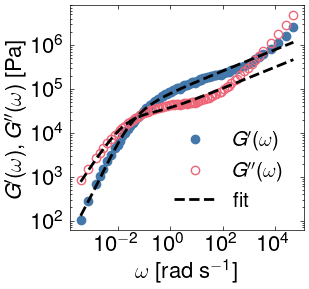

In [4]:
from pyRheo.oscillation_model import OscillationModel

# Load data
omega_mc = df_sorted['Angular Frequency'].values
G_prime_mc = df_sorted['G_prime'].values
G_double_prime_mc = df_sorted['G_double_prime'].values


# Downsample 'Angular Frequency' and 'G_relax' by selecting every 100th row
omega = omega_mc[::2]
G_prime = G_prime_mc[::2]
G_double_prime = G_double_prime_mc[::2]


# Model fitting
model = OscillationModel(model="auto", initial_guesses="random", num_initial_guesses=200, minimization_algorithm="Powell")
model.fit(omega, G_prime, G_double_prime)

model.print_parameters()
model.print_error()
model.plot(omega, G_prime, G_double_prime, savefig=False)

Best initial guess was: [289392383.1695473, 190495060.56684747, 56787516.86731913, 0.43318097600117]
V: 1877743.486965668
G: 82940.78723558075
K: 101.06431268848267
beta: 0.24828117309028605
RSS: 8.893781601941516
Mean Percentage Error: 13.39%


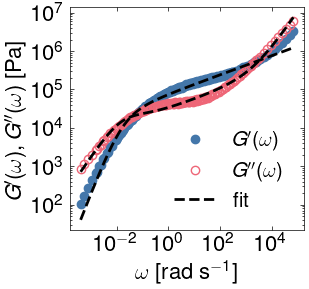

In [5]:
# Load data
omega_mc = df_sorted['Angular Frequency'].values
G_prime_mc = df_sorted['G_prime'].values
G_double_prime_mc = df_sorted['G_double_prime'].values


# Downsample 'Angular Frequency' and 'G_relax' by selecting every 100th row
omega = omega_mc[::1]
G_prime = G_prime_mc[::1]
G_double_prime = G_double_prime_mc[::1]

# Model fitting
model = OscillationModel(model="FractionalZenerLiquidDashpot", initial_guesses="random", num_initial_guesses=200, minimization_algorithm="Powell")
model.fit(omega, G_prime, G_double_prime)

model.print_parameters()
model.print_error()
model.plot(omega, G_prime, G_double_prime, savefig=False)

/tmp/ipykernel_127857/2434285692.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('tab20c', 7)


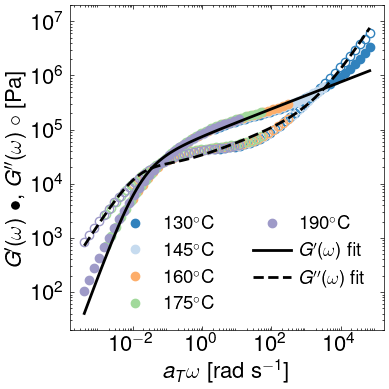

In [8]:
from itertools import cycle

# Plot master curve labeled with the model prediction
omega_predict = np.logspace(np.min(np.log10(omega_mc)), np.max(np.log10(omega_mc)), 100)
G_prime_predict, G_double_prime_predict = model.predict(omega_predict)


from matplotlib.ticker import LogLocator

# List of files to process
sorted_filenames = [
    'demos/data/oscillation_ps130_data.csv',
    'demos/data/oscillation_ps145_data.csv',
    'demos/data/oscillation_ps160_data.csv',
    'demos/data/oscillation_ps175_data.csv',    
    'demos/data/oscillation_ps190_data.csv',]


# Adjusted size for better visibility of multiple plots
plt.figure(figsize=(4, 4))

# Reordered labels based on temperatures (minimum temperature first)
labels = ["$130^{\circ}$C", "$145^{\circ}$C", "$160^{\circ}$C", "$175^{\circ}$C", "$190^{\circ}$C"]

from matplotlib import cm

num_files = len(sorted_filenames)

# Generate colors using a colormap
colormap = cm.get_cmap('tab20c', 7)
colors = [colormap(i) for i in range(num_files)]

# Visualization
for i, filename in enumerate(sorted_filenames):
    # Load the data
    data = pd.read_csv(filename, decimal='.', encoding='utf-8', sep='\t')
    data.columns = columns

    # Extract the relevant columns and apply log10
    log_interval_omega = np.log10(data['Angular Frequency'])
    log_storage_modulus = np.log10(data['Storage Modulus'])
    log_loss_modulus = np.log10(data['Loss Modulus'])

    # Apply shift factor
    log_interval_omega_shifted = log_interval_omega - shifts[i]

    # Assign label from reordered list based on the current index i
    label = labels[i]
    color = colors[i % len(colors)]  # Get color from the cycle

    
    # Plot the data
    plt.plot(10**log_interval_omega_shifted, 10**log_storage_modulus, 'o', color=color, markersize=6, markevery=1, alpha=1, label=labels[i])
    plt.plot(10**log_interval_omega_shifted, 10**log_loss_modulus, 'o', fillstyle='none', color=color, markersize=6, markevery=1)


# Plot the results
#plt.plot(omega_mc, G_relax_mc, 'o', markersize=6, label='master curve')
plt.plot(omega_predict, G_prime_predict, '-', color="k", lw=2, label='$G^{\prime}(\omega)$ fit')
plt.plot(omega_predict, G_double_prime_predict, '--', color="k", lw=2, label='$G^{\prime \prime}(\omega)$ fit')


# Customize the plot
plt.xscale("log")
plt.yscale("log")

# Adjust the tick locations on both axes to avoid crowding
plt.gca().xaxis.set_major_locator(LogLocator(base=10.0, numticks=5))  # X-axis log ticks
plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, numticks=6))  # Y-axis log ticks

# Font sizes for the ticks, labels, and legend
#plt.xlim(2e-4, 5e5)
plt.ylim(2e1, 2e7)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$a_{T} \omega$ [rad s$^{-1}$]', fontsize=16)
plt.ylabel(r'$G^{\prime}(\omega)~\bullet$, $G^{\prime \prime}(\omega)~\circ$ [Pa]', fontsize=16)
plt.legend(fontsize=13.5, loc='lower right', ncol=2, handletextpad=0.5)
plt.grid(False)
plt.tight_layout()
plt.savefig("ps_oscillation_mc.pdf", format="pdf", bbox_inches='tight')
plt.show()